In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def display_pic(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [15]:
reeses = cv2.imread('E://University-working/openCV python/Udemy - Python for Computer Vision with OpenCV and Deep Learning 2019-9/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

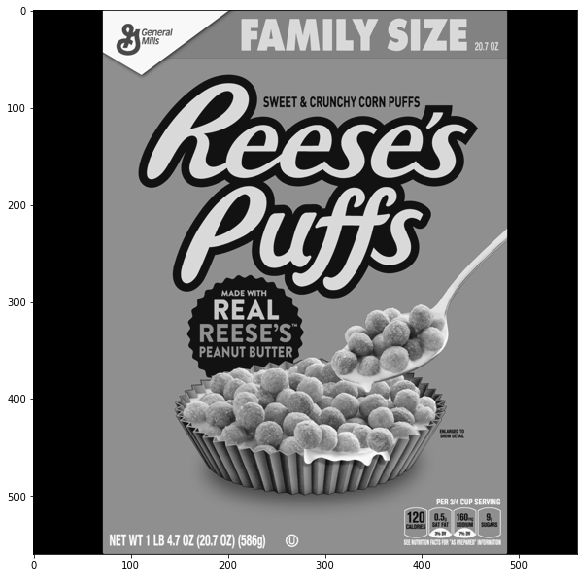

In [16]:
display_pic(reeses)

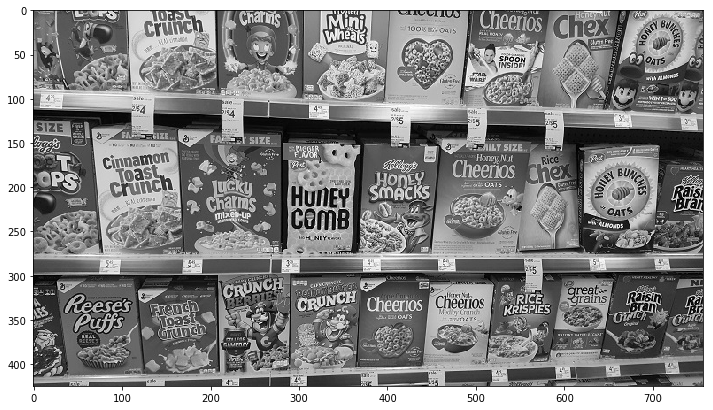

In [17]:
cereals = cv2.imread('E://University-working/openCV python/Udemy - Python for Computer Vision with OpenCV and Deep Learning 2019-9/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display_pic(cereals)

In [18]:
orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [19]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches,key=lambda x:x.distance)

In [20]:
matches[0].distance

42.0

In [21]:
reesses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

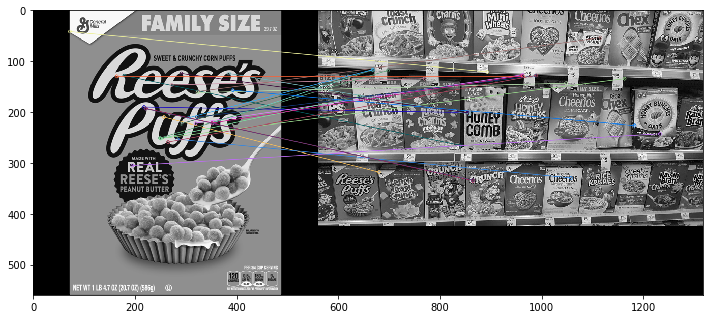

In [22]:
display_pic(reesses_matches)

In [24]:
sift = cv2.SIFT_create()

In [25]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [26]:
bf = cv2.BFMatcher()

In [27]:
matches = bf.knnMatch(des1,des2,k=2)

In [28]:
good=[]

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
        
len(good)

78

In [29]:
len(matches)

1500

In [30]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

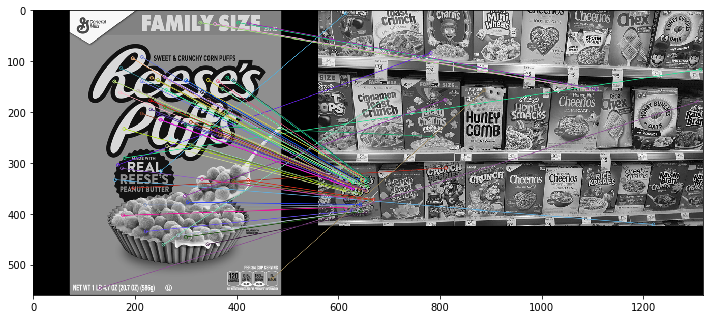

In [31]:
display_pic(sift_matches)

In [59]:
sift = cv2.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [60]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=15)
search_params = dict(check=50)

In [61]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [62]:
matches = flann.knnMatch(des1,des2,k=2)

In [63]:
matchesMask = [[0,0] for i in range(len(matches))]

In [64]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [68]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

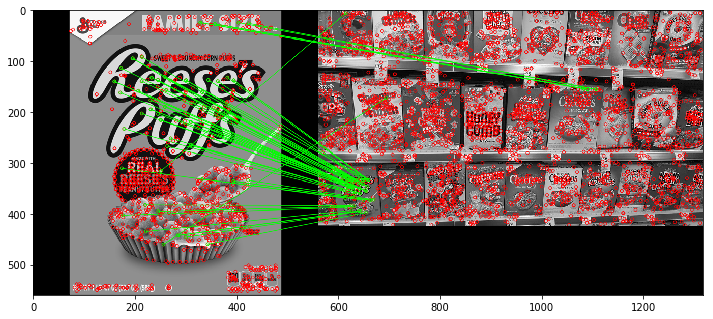

In [69]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display_pic(flann_matches)